## Introduction
-----
You (an electrical engineer) wish to determine the resistance of an electrical component by using Ohm's law. You remember from your high school circuit classes that $$V = RI$$ where $V$ is the voltage in volts, $R$ is resistance in ohms, and $I$ is electrical current in amperes. Using a multimeter, you collect the following data:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

Your goal is to 
1. Fit a line through the origin (i.e., determine the parameter $R$ for $y = Rx$) to this data by using the method of least squares. You may assume that all measurements are of equal importance. 
2. Consider what the best estimate of the resistance is, in ohms, for this component.

## Getting Started
----

First we will import the neccesary Python modules and load the current and voltage measurements into numpy arrays:

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors.
I = np.mat([0.2, 0.3, 0.4, 0.5, 0.6]).T
V = np.mat([1.23, 1.38, 2.06, 2.47, 3.17]).T

Now we can plot the measurements - can you see the linear relationship between current and voltage?

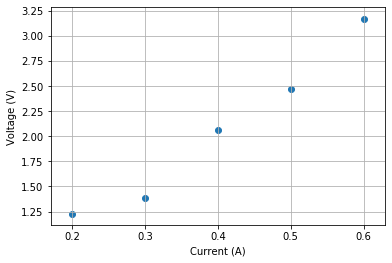

In [2]:
plt.scatter(np.asarray(I), np.asarray(V))

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Estimating the Slope Parameter
----
Let's try to estimate the slope parameter $R$ (i.e., the resistance) using the least squares formulation from Module 1, Lesson 1 - "The Squared Error Criterion and the Method of Least Squares":

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

If we know that we're looking for the slope parameter $R$, how do we define the matrix $\mathbf{H}$ and vector $\mathbf{y}$?

In [51]:
# Define the H matrix, what does it contain?
# H = ...
H = np.ones_like(V)
y = V / I

print("H=\n{}\n".format(H))
print("y=\n{}\n".format(y))

# Now estimate the resistance parameter.
# R = ... 
R = (inv(H.T*H)*H.T*y)

print('The slope parameter (i.e., resistance) for the best-fit line is:')
print(R)


H=
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

y=
[[6.15      ]
 [4.6       ]
 [5.15      ]
 [4.94      ]
 [5.28333333]]

The slope parameter (i.e., resistance) for the best-fit line is:
[[5.22466667]]


## Plotting the Results
----
Now let's plot our result. How do we relate our linear parameter fit to the resistance value in ohms?

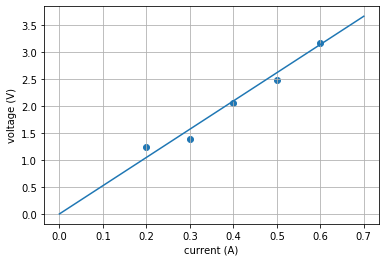

In [45]:
I_line = np.arange(0, 0.8, 0.1)
V_line = (R*I_line).T

plt.scatter(np.asarray(I), np.asarray(V))
plt.plot(I_line, V_line)
plt.xlabel('current (A)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

If you have implemented the estimation steps correctly, the slope parameter $\hat{R}$ should be close to the actual resistance value of $R = 5~\Omega$. However, the estimated value will not match the true resistance value exactly, since we have only a limited number of noisy measurements.